In [359]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

base_path = "data"
dataset_csv_path = os.path.join(base_path,"data.csv")
dataset_description_csv_path = os.path.join(base_path,"data_description.xlsx")


In [360]:
import pandas as pd

# Load Dataset Description and Clean it
dataset_description = pd.read_excel(dataset_description_csv_path)
dataset_description.loc[dataset_description['Name'] == 'InputB5', 'Description'] = 'Mass flow rate'
dataset_description.loc[dataset_description['Name'] == 'InputA5', 'Description'] = 'Mass flow rate'

# Convert index to strings
dataset_description.index = dataset_description.index.astype(str)




# Move the last column to the first position
dataset_description = dataset_description[['Description', 'Units', 'Name']]

# Drop NaN values and set index
dataset_description = dataset_description.dropna()
dataset_description.loc[-1] = ['TimeStamp', 'yyyy-MM-dd HH:mm:ss', 'TimeStamp']  # adding a row
dataset_description = dataset_description.set_index('Name')
dataset_description = dataset_description.sort_index()  # sorting by index

# move TimeStamp to the first row
dataset_description = dataset_description.reindex(['TimeStamp'] + list(dataset_description.drop(['TimeStamp'], axis=0).index))


dataset_description

,Description,Units
Name,,
TimeStamp,TimeStamp,yyyy-MM-dd HH:mm:ss
InputA1,Temperature,°C
InputA2,Flowrate,m3/h
InputA3,Amount of sludge in water,mg/l
InputA4,Conductivity,mS/cm
InputA5,Mass flow rate,kg/h
InputA6,pH,pH
InputB1,Temperature,°C
InputB2,Flowrate,m3/h


In [361]:
# Categorize inputs for Tank 1, Tank 2, and Pipes
Tank_Inputs = dataset_description[dataset_description['Description'].str.contains('tank 1', case=False) | dataset_description['Description'].str.contains('tank 2', case=False)]

# Extract Tank_1 and Tank_2 inputs
Tank_1_inputs = Tank_Inputs[Tank_Inputs['Description'].str.contains('tank 1', case=False)]
Tank_2_inputs = Tank_Inputs[Tank_Inputs['Description'].str.contains('tank 2', case=False)]

# Extract Pipes inputs
Pipes = dataset_description[~dataset_description.index.isin(Tank_Inputs.index)]

In [362]:
import pandas as pd

# cconverte Tank_1_inputs, Tank_2_inputs, and Pipes into DataFrames
Tank_1_inputs = pd.DataFrame(Tank_1_inputs)
Tank_2_inputs = pd.DataFrame(Tank_2_inputs)
Pipes = pd.DataFrame(Pipes)


# Create a dictionary to map index levels to their corresponding DataFrames
input_frames = {'Tank 1': Tank_1_inputs, 'Tank 2': Tank_2_inputs, 'Pipes': Pipes}

input_frames

# Create a MultiIndex from the 'Description' and 'Units' columns
multi_index = pd.MultiIndex.from_frame(dataset_description[['Description', 'Units']], names=['Description', 'Units'])

# Initialize an empty DataFrame with the multi_index
multi_index_df = pd.DataFrame(index=multi_index)

# Assign data from each input frame to its corresponding level in the multi_index
for level, frame in input_frames.items():
    # Check if 'Name' column is present in the DataFrame
    if 'Name' in frame.columns:
        # Select relevant columns for the given level
        level_columns = frame.set_index('Name')[['Description', 'Units']]
        # Assign data to the corresponding level in the multi_index_df
        multi_index_df[level] = level_columns

# Display the resulting multi-index DataFrame
print(multi_index_df)


{'Tank 1':                                    Description Units
 Name                                                
 InputC1                O2 percentage in tank 1     %
 InputC10       Temperature of liquid in tank 1    °C
 InputC2      Liquid to reduce the pH in tank 1   l/h
 InputC3   Filtered sludge going back to tank 1  m3/h
 InputC5                       Height in tank 1     m
 InputC6   Flowrate to pH measurement in tank 1   l/h
 InputC7                 pH of liquid in tank 1    pH
 InputC8   Flowrate to O2 measurement in tank 1   l/h
 InputC9                 O2 dissolved in tank 1  mg/l
 InputD6   Flowrate to pH measurement in tank 1   l/h,
 'Tank 2':                                    Description Units
 Name                                                
 InputD1                O2 percentage in tank 2     %
 InputD10       Temperature of liquid in tank 2    °C
 InputD2      Liquid to reduce the pH in tank 2   l/h
 InputD3   Filtered sludge going back to tank 2  m3/h
 InputD

In [363]:
# read the dataset
dataset = pd.read_csv(dataset_csv_path)
# set the name of the first column to TimeTaken
dataset = dataset.rename(columns={dataset.columns[0]: "TimeStamp"})
# set datatupe of TimeTaken to datetime
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'])

# replace the column names with the description from the description dataset
dataset.columns = dataset_description['Description'].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76474 entries, 0 to 76473
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   TimeStamp                             76474 non-null  datetime64[ns]
 1   Temperature                           71948 non-null  float64       
 2   Flowrate                              70943 non-null  float64       
 3   Amount of sludge in water             71116 non-null  float64       
 4   Conductivity                          76396 non-null  float64       
 5   Mass flow rate                        67461 non-null  float64       
 6   pH                                    70914 non-null  float64       
 7   Temperature                           70852 non-null  float64       
 8   Flowrate                              70828 non-null  float64       
 9   Amount of sludge in water             70880 non-null  float64       
 10

In [364]:
def plot_data_from_column_using_date_range(column_name, start_date, end_date):
    dataset[column_name].loc[(dataset['TimeStamp'] > start_date) & (dataset['TimeStamp'] < end_date)].plot(figsize=(20,10))

In [365]:
# how many null values are there in each column
dataset.isnull().sum()

TimeStamp                                   0
Temperature                              4526
Flowrate                                 5531
Amount of sludge in water                5358
Conductivity                               78
Mass flow rate                           9013
pH                                       5560
Temperature                              5622
Flowrate                                 5646
Amount of sludge in water                5594
Conductivity                             5672
Mass flow rate                           5603
pH                                       1887
O2 percentage in tank 1                 43354
Temperature of liquid in tank 1          4551
Liquid to reduce the pH in tank 1        5284
Filtered sludge going back to tank 1     5336
Outside air                                76
Height in tank 1                        10121
Flowrate to pH measurement in tank 1     5593
pH of liquid in tank 1                   5346
Flowrate to O2 measurement in tank

In [366]:
# Data Cleaning and Imputation
# Null Values 
# Method 1: Drop all the rows with null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

# Method 2 : Replace null values with the mean of the column
# # replace all the null values in InputC1 with the mean of the column from the same day
# dataset['InputC1'] = dataset.groupby(dataset['TimeStamp'].dt.date)['InputC1'].transform(lambda x: x.fillna(x.mean()))


TimeStamp                               0
Temperature                             0
Flowrate                                0
Amount of sludge in water               0
Conductivity                            0
Mass flow rate                          0
pH                                      0
Temperature                             0
Flowrate                                0
Amount of sludge in water               0
Conductivity                            0
Mass flow rate                          0
pH                                      0
O2 percentage in tank 1                 0
Temperature of liquid in tank 1         0
Liquid to reduce the pH in tank 1       0
Filtered sludge going back to tank 1    0
Outside air                             0
Height in tank 1                        0
Flowrate to pH measurement in tank 1    0
pH of liquid in tank 1                  0
Flowrate to O2 measurement in tank 1    0
O2 dissolved in tank 1                  0
O2 percentage in tank 2           

In [367]:
dataset.describe()

,TimeStamp,Temperature,Flowrate,Amount of sludge in water,Conductivity,Mass flow rate,pH,Temperature,Flowrate,Amount of sludge in water,...,Outside air,Height in tank 2,Flowrate to pH measurement in tank 1,pH of liquid in tank 2,Flowrate to O2 measurement in tank 2,O2 dissolved in tank 2,Consentration of sludge,Conductivity,NO3 dissolved,Target variable
count,17527,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,...,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000
mean,2022-08-20 01:23:42.359787776,17.593972,33.089738,88.479051,716.138192,17.722226,1607.951553,7.436448,1819.550922,1.500427,...,70.839968,15.895899,6.784977,29.331343,30.143704,112.932035,3.042991,3.348306,6.709526,21.426566
min,2022-05-21 00:35:00,15.806650,-0.440424,-2.850274,26.812020,17.181650,3.750000,7.052068,3.269135,0.212584,...,0.118166,-0.071140,2.397020,16.745860,-0.770695,0.525000,0.007180,-0.146004,4.538803,-0.003886
25%,2022-08-04 01:02:30,17.326025,23.819205,89.738925,514.335150,17.383695,1470.142000,7.351479,1807.632000,1.450305,...,64.882770,10.759190,6.650610,26.815250,22.017035,57.861575,2.012487,1.680634,6.323720,16.690705
50%,2022-08-19 10:00:00,17.618970,33.141430,89.962800,624.610600,17.470800,1718.374000,7.485854,1863.819000,1.511549,...,75.866490,13.791950,6.764565,29.617420,28.477090,100.497800,2.949641,2.799487,6.688683,19.444680
75%,2022-09-08 04:32:30,17.943575,40.889745,90.101685,832.247500,18.294035,1798.161500,7.503230,1904.365500,1.563032,...,81.183280,19.138840,6.903285,32.453460,36.666910,156.138850,3.917330,4.552911,7.039086,23.968210
max,2022-09-23 13:45:00,18.391910,202.836800,248.376300,1527.085000,18.415400,2116.163000,8.385586,2059.961000,3.381146,...,92.420960,78.275940,12.137340,43.624690,127.795700,571.200000,10.165010,24.589740,8.939406,153.000700
std,NaN,0.409134,15.272905,10.192786,287.860807,0.432308,302.791728,0.123244,173.530147,0.200388,...,13.500282,8.224991,0.518383,4.261718,11.662200,72.436296,1.302816,2.331414,0.674223,12.153618


In [368]:
def plot_histogram_from_column(column_name, bins):
    plt.figure(figsize=(20,10))
    dataset[column_name].hist(figsize=(20,10), bins=bins)
    plt.show()
    
def drop_from_column_using_upper_quantile(dataset,column_name, upper_quantile):
    dataset = dataset[dataset[column_name] < dataset[column_name].quantile(upper_quantile)]
    return dataset

def drop_from_column_using_lower_quantile(dataset,column_name, lower_quantile):
    dataset = dataset[dataset[column_name] > dataset[column_name].quantile(lower_quantile)]
    return dataset  

In [369]:
# Outliers
# Method 1: Drop all the rows with outliers
# # Column InputC2
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC2', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC2', 0.25)
# # Column InputC3
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC3', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC3', 0.25)




# remove 

# Outlier Strategy
- For each column, we want to define our strategy for detecting outliers and then further specify our strategy for dealing with them in the next step.

### Outlier Detection Strategy per column
- **Input C1:** All the values are pretty close to the mean. I don't believe there are any outliers. (Assuming Method 1 for null values was used)

- **Input C2:** Since the data doesn't appear to be left or right skewed, we can just use the upper and lower quartile. rather than z-score for outlier detection.

- **Input C3:** 


In [370]:
def calculate_zscore_from_column(dataset,column_name):
    dataset[column_name+'_zscore'] = (dataset[column_name] - dataset[column_name].mean())/dataset[column_name].std(ddof=0)
    return dataset
# def calculate

In [371]:
dataset['O2 percentage in tank 1'].describe()

count    17527.000000
mean         9.407557
std         13.941808
min          0.000019
25%          1.013800
50%          2.103991
75%         10.714395
max         51.000000
Name: O2 percentage in tank 1, dtype: float64

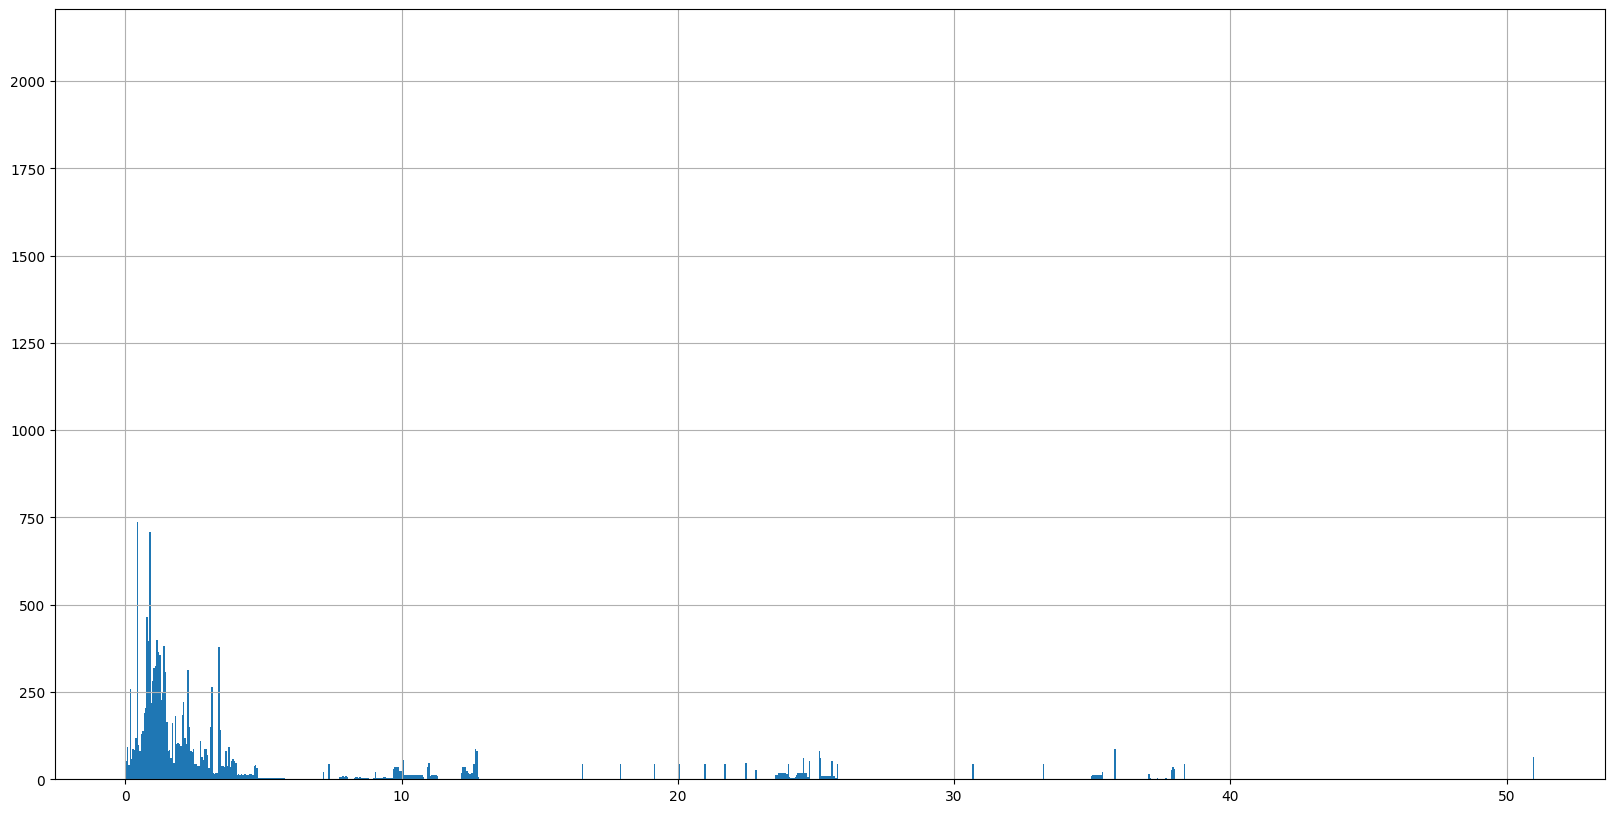

In [372]:
plot_histogram_from_column('O2 percentage in tank 1',1000)